#### Task 1: Import Libraries:
a. Import required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import pandas as pd

#### Task 2: Import Dataset:
a. Load dataset using keras API.

b. Dataset must be pre-processed before training the network, if you check image in
the training, you will see pixel value range from 0 to 255, scale these values range
from 0 to 1. [note it is important that both training and testing dataset pre-processed same way].

In [2]:
# Load the MNIST dataset
(X_train_full, Y_train_full), (X_test, Y_test) = mnist.load_data()

In [3]:
# Data Exploration
print("Training images:", X_train_full.shape)
print("Training labels:", Y_train_full.shape)
print("Test images:", X_test.shape)
print("Test labels:", Y_test.shape)
print("Data type for training images:", X_train_full.dtype)

Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)
Data type for training images: uint8


In [4]:
# Define class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
# Preprocess Data
x_valid, x_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test / 255.0

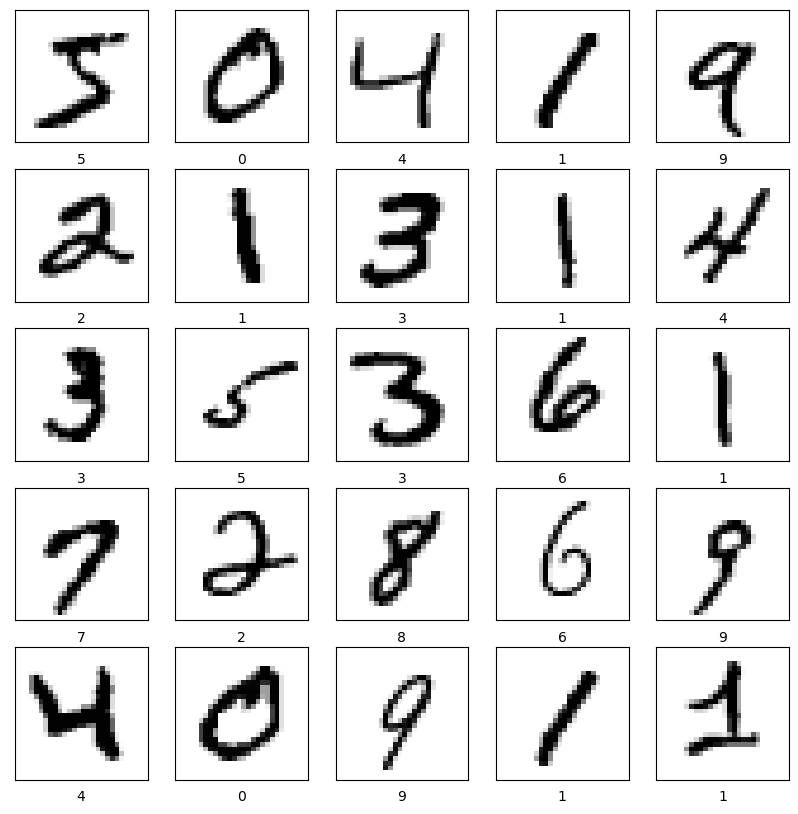

In [7]:
# Data Visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train_full[i]])
plt.show()

#### Task 3: Build a Classifier using MLP
a. The layer is the most fundamental component of a neural network. Data is put into
layers, and they extract representations from it. Choose the number of stacking
layers so that model representations should, be useful for the given task.

In [8]:
# Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer, 28x28 pixels
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons and softmax activation
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Task 4: Compile the Model
a. A few more parameters are required before the model can be used for training.

These are added at the build step of the model: Choose these parameters.

a.1 Loss function

a.2 Optimizer

a.3 Metrics


In [9]:
# Compile the Model
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

#### Task 5: Train and Test the model.

a. Feed the training data to the built model.

b. Ask model to make predictions about a test set.

c. Verify that the predictions match the labels from the test labels.

In [10]:
# Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6883 - accuracy: 0.8176 - val_loss: 0.3263 - val_accuracy: 0.9090
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.9113 - val_loss: 0.2611 - val_accuracy: 0.9264
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2555 - accuracy: 0.9260 - val_loss: 0.2229 - val_accuracy: 0.9376
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2225 - accuracy: 0.9363 - val_loss: 0.2017 - val_accuracy: 0.9488
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1983 - accuracy: 0.9435 - val_loss: 0.1783 - val_accuracy: 0.9528
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1784 - accuracy: 0.9487 - val_loss: 0.1615 - val_accuracy: 0.9576
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1619 - accuracy: 0.9530 - val_loss: 0.1506 - val_accuracy:

In [11]:
# Training and Validation Metrics
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Loss: 0.12548993527889252
Training Accuracy: 0.9638363718986511
Validation Loss: 0.12534436583518982
Validation Accuracy: 0.9675999879837036


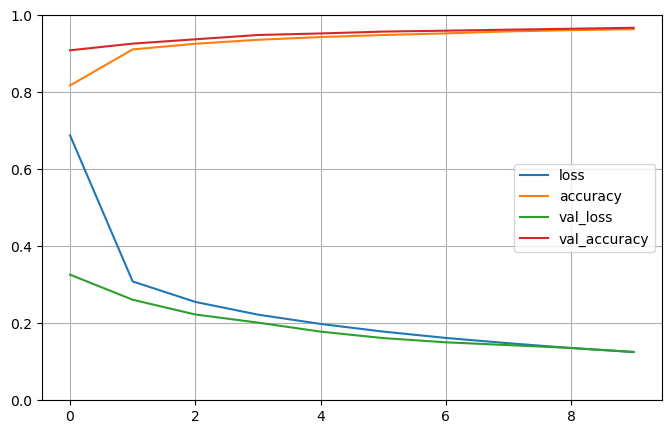

In [12]:
# Plot Training History
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9612

Test Accuracy: 0.9611999988555908
Test Loss: 0.12835928797721863


In [14]:
# Model Predictions
probability = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability.predict(X_test)
print("Predictions shape:", predictions.shape)

313/313 [==============================] - 1s 3ms/step
Predictions shape: (10000, 10)


In [15]:
# Example of Predictions
sample_index = 0
print("Predicted Probabilities for Sample", sample_index, ":", predictions[sample_index])
predicted_class = np.argmax(predictions[sample_index])
print("Predicted Class for Sample", sample_index, ":", class_names[predicted_class])
actual_class = class_names[Y_test[sample_index]]
print("Actual Class for Sample", sample_index, ":", actual_class)

Predicted Probabilities for Sample 0 : [0.08541045 0.08540504 0.08547077 0.08578877 0.08540495 0.08541156
 0.08540493 0.23088709 0.08540567 0.08541071]
Predicted Class for Sample 0 : 7
Actual Class for Sample 0 : 7


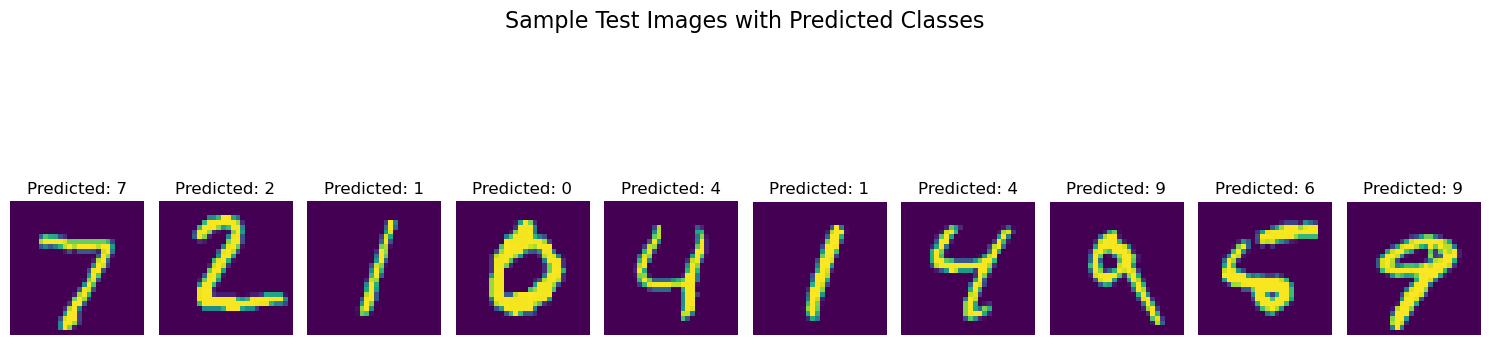

In [16]:
# Display a few test images along with their predicted classes
num_images_to_display = 10
plt.figure(figsize=(15, 5))
plt.suptitle('Sample Test Images with Predicted Classes', fontsize=16)

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='viridis')
    plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
